In [3]:
#install.packages("tidyverse")
#install.packages("gganimate")
#install.packages("plotly")
#install.packages("gifski")
#install.packages("RColorBrewer")
#install.packages("wesanderson")
#install.packages("neuralnet")
#install.packages("NeuralNetTools")

library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)


library(neuralnet)
library(NeuralNetTools)

In [10]:
# código limpieza y manipulación 
casos_diarios <-  read.csv(file = "Casos_Diarios_Estado_Nacional.csv")
casos_diario_list <- gather(casos_diarios,key ="dias",value="infectados",4:856)

normalizarfecha <- function(fecha){
return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {
labels_meses <- c(
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic")
    return(factor(x,levels = (1:12),labels = labels_meses))
    }

fecha = map(casos_diario_list[4],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diario_list[c(TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)
casos_diarios_fecha <- casos_diarios_fecha[c(1,2,3,5,4)]

datos <- separate( data = casos_diarios_fecha,
                   col =dias,
                   into = c("dia","mes","año"),
                   sep = '/',
                   remove = FALSE)
#recordatorio
datos <- datos %>% 
    mutate(mest_txt = cod_Meses(as.integer(mes))) %>% 
    mutate(consecutivo = 1:28149)
head(datos)

,cve_ent,poblacion,nombre,dias,dia,mes,año,infectados,mest_txt,consecutivo
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>
1,1,1434635,AGUASCALIENTES,26/02/2020,26,02,2020,0,Feb,1
2,2,3634868,BAJA CALIFORNIA,26/02/2020,26,02,2020,0,Feb,2
3,3,804708,BAJA CALIFORNIA SUR,26/02/2020,26,02,2020,0,Feb,3
4,4,1000617,CAMPECHE,26/02/2020,26,02,2020,0,Feb,4
5,7,5730367,CHIAPAS,26/02/2020,26,02,2020,0,Feb,5
6,8,3801487,CHIHUAHUA,26/02/2020,26,02,2020,0,Feb,6


In [43]:
datos$nombre

[1] "AGUASCALIENTES"      "BAJA CALIFORNIA"     "BAJA CALIFORNIA SUR"
    [4] "CAMPECHE"            "CHIAPAS"             "CHIHUAHUA"          
    [7] "DISTRITO FEDERAL"    "COAHUILA"            "COLIMA"             
   [10] "DURANGO"             "GUANAJUATO"          "GUERRERO"           
   [13] "HIDALGO"             "JALISCO"             "MEXICO"             
   [16] "MICHOACAN"           "MORELOS"             "NAYARIT"            
   [19] "NUEVO LEON"          "OAXACA"              "PUEBLA"             
   [22] "QUERETARO"           "QUINTANA ROO"        "SAN LUIS POTOSI"    
   [25] "SINALOA"             "SONORA"              "TABASCO"            
   [28] "TAMAULIPAS"          "TLAXCALA"            "VERACRUZ"           
   [31] "YUCATAN"             "ZACATECAS"           "Nacional"           
   [34] "AGUASCALIENTES"      "BAJA CALIFORNIA"     "BAJA CALIFORNIA SUR"
   [37] "CAMPECHE"            "CHIAPAS"             "CHIHUAHUA"          
   [40] "DISTRITO FEDERAL"    "COAHUILA"            "COLIMA"             
   [43] "DURANGO"             "GUANAJUATO"          "GUERRERO"           
   [46] "HIDALGO"             "JALISCO"             "MEXICO"             
   [49] "MICHOACAN"           "MORELOS"             "NAYARIT"            
   [52] "NUEVO LEON"          "OAXACA"              "PUEBLA"             
   [55] "QUERETARO"           "QUINTANA ROO"        "SAN LUIS POTOSI"    
   [58] "SINALOA"             "SONORA"              "TABASCO"            
   [61] "TAMAULIPAS"          "TLAXCALA"            "VERACRUZ"           
   [64] "YUCATAN"             "ZACATECAS"           "Nacional"           
   [67] "AGUASCALIENTES"      "BAJA CALIFORNIA"     "BAJA CALIFORNIA SUR"
   [70] "CAMPECHE"            "CHIAPAS"             "CHIHUAHUA"          
   [73] "DISTRITO FEDERAL"    "COAHUILA"            "COLIMA"             
   [76] "DURANGO"             "GUANAJUATO"          "GUERRERO"           
   [79] "HIDALGO"             "JALISCO"             "MEXICO"             
   [82] "MICHOACAN"           "MORELOS"             "NAYARIT"            
   [85] "NUEVO LEON"          "OAXACA"              "PUEBLA"             
   [88] "QUERETARO"           "QUINTANA ROO"        "SAN LUIS POTOSI"    
   [91] "SINALOA"             "SONORA"              "TABASCO"            
   [94] "TAMAULIPAS"          "TLAXCALA"            "VERACRUZ"           
   [97] "YUCATAN"             "ZACATECAS"           "Nacional"           
  [100] "AGUASCALIENTES"      "BAJA CALIFORNIA"     "BAJA CALIFORNIA SUR"
  [103] "CAMPECHE"            "CHIAPAS"             "CHIHUAHUA"          
  [106] "DISTRITO FEDERAL"    "COAHUILA"            "COLIMA"             
  [109] "DURANGO"             "GUANAJUATO"          "GUERRERO"           
  [112] "HIDALGO"             "JALISCO"             "MEXICO"             
  [115] "MICHOACAN"           "MORELOS"             "NAYARIT"            
  [118] "NUEVO LEON"          "OAXACA"              "PUEBLA"             
  [121] "QUERETARO"           "QUINTANA ROO"        "SAN LUIS POTOSI"    
  [124] "SINALOA"             "SONORA"              "TABASCO"            
  [127] "TAMAULIPAS"          "TLAXCALA"            "VERACRUZ"           
  [130] "YUCATAN"             "ZACATECAS"           "Nacional"           
  [133] "AGUASCALIENTES"      "BAJA CALIFORNIA"     "BAJA CALIFORNIA SUR"
  [136] "CAMPECHE"            "CHIAPAS"             "CHIHUAHUA"          
  [139] "DISTRITO FEDERAL"    "COAHUILA"            "COLIMA"             
  [142] "DURANGO"             "GUANAJUATO"          "GUERRERO"           
  [145] "HIDALGO"             "JALISCO"             "MEXICO"             
  [148] "MICHOACAN"           "MORELOS"             "NAYARIT"            
  [151] "NUEVO LEON"          "OAXACA"              "PUEBLA"             
  [154] "QUERETARO"           "QUINTANA ROO"        "SAN LUIS POTOSI"    
  [157] "SINALOA"             "SONORA"              "TABASCO"            
  [160] "TAMAULIPAS"          "TLAXCALA"            "VERACRUZ"           
  [163] 

# Tratamiento adicional de los datos

In [11]:
datosf<- datos %>%
    filter(año=="2020")%>%
    filter(nombre=="Nacional")%>%
    mutate(consecutivo=1:310)%>%
    mutate(infectadosnew=(infectados/poblacion)*100000)
head(datosf)

,cve_ent,poblacion,nombre,dias,dia,mes,año,infectados,mest_txt,consecutivo,infectadosnew
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>,<dbl>
1,0,127792286,Nacional,26/02/2020,26,02,2020,0,Feb,1,0.000000000
2,0,127792286,Nacional,27/02/2020,27,02,2020,4,Feb,2,0.003130079
3,0,127792286,Nacional,28/02/2020,28,02,2020,2,Feb,3,0.001565040
4,0,127792286,Nacional,29/02/2020,29,02,2020,2,Feb,4,0.001565040
5,0,127792286,Nacional,01/03/2020,01,03,2020,2,Mar,5,0.001565040
6,0,127792286,Nacional,02/03/2020,02,03,2020,5,Mar,6,0.003912599


In [27]:
min_d <- datosf %>%
    select(consecutivo, poblacion, infectadosnew)%>%
    apply(2,min)
min_d[2]<-0 # el lugar mas despoblado de Mexico :S
min_d

max_d <- datosf %>%
    select(consecutivo, poblacion, infectadosnew)%>%
    apply(2,max)

max_d

max_inf <- max(datosf$infectadosnew)
min_inf <- min(datosf$infectadosnew)

# NORMALIZAR DATOS
dnacionalnorm <- scale(select(datosf,consecutivo, poblacion, infectadosnew), center=min_d, scale=max_d-min_d)

consecutivo     poblacion infectadosnew 
            1             0             0

consecutivo     poblacion infectadosnew 
 3.100000e+02  1.277923e+08  1.269560e+01

# Modelo de Machine Learning

In [16]:
f <- as.formula(infectadosnew ~ consecutivo)

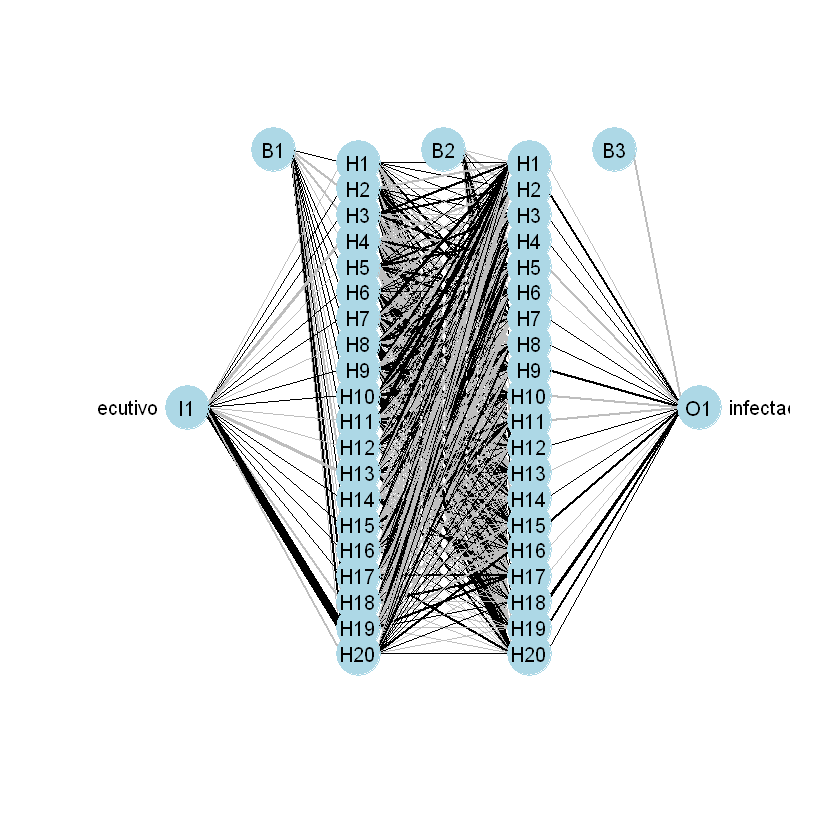

In [33]:
nnet <- neuralnet(f, data=dnacionalnorm,
        hidden = c(20,20),
        threshold = 0.05,
        algorithm = "rprop+",
        stepmax = 10000,
        rep = 5,
        act.fct = "tanh" )

##
plotnet(nnet)

In [34]:
eval_nn <- predict(nnet,dnacionalnorm[,1:2])
#eval_nn

# Visualizacion de datos

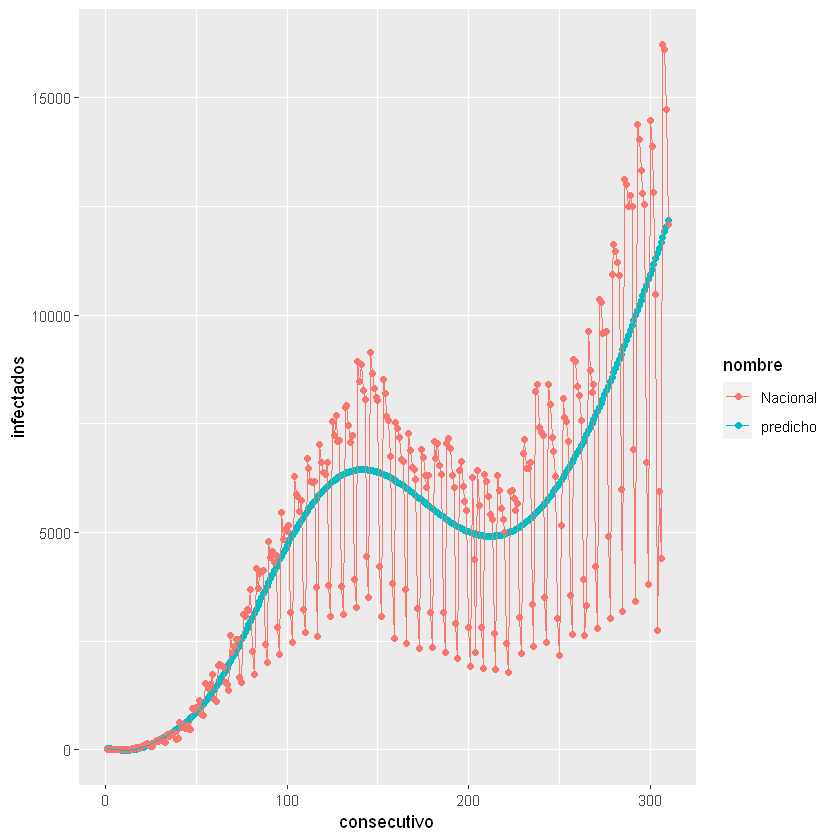

In [36]:
resultado <- data.frame(
    nombre ="predicho",
    consecutivo= 1:310,
    infectados = eval_nn* ((max_inf-min_inf)+min_inf)*max_d[2]/100000
)
#resultado

datosfs <- datosf %>% select(nombre,consecutivo,infectados)
resultado <- rbind(resultado,datosfs) # unimos prediccion y datos nacionales en una columna

resultado %>% ggplot(aes(x=consecutivo, y =infectados,group=nombre, color=nombre))+
    geom_point()+ geom_line()




# Predecir entidades

In [51]:
datosDgo<- datos %>%
    filter(año=="2020")%>%
    filter(nombre=="DURANGO")%>%
    mutate(consecutivo=1:310)%>%
    mutate(infectadosnew=(infectados/poblacion)*100000)
head(datosf)

min_d <- datosDgo %>%
    select(consecutivo, poblacion, infectadosnew)%>%
    apply(2,min)
min_d[2]<-0 # el lugar mas despoblado de Mexico :S
min_d

max_d <- datosDgo %>%
    select(consecutivo, poblacion, infectadosnew)%>%
    apply(2,max)

max_d

max_inf <- max(datosDgo$infectadosnew)
min_inf <- min(datosDgo$infectadosnew)

# NORMALIZAR DATOS
ddurangonorm <- scale(select(datosf,consecutivo, poblacion, infectadosnew), center=min_d, scale=max_d-min_d)

f <- as.formula(infectadosnew ~ consecutivo)

,cve_ent,poblacion,nombre,dias,dia,mes,año,infectados,mest_txt,consecutivo,infectadosnew
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>,<dbl>
1,10,1868996,DURANGO,26/02/2020,26,02,2020,0,Feb,1,0
2,10,1868996,DURANGO,27/02/2020,27,02,2020,0,Feb,2,0
3,10,1868996,DURANGO,28/02/2020,28,02,2020,0,Feb,3,0
4,10,1868996,DURANGO,29/02/2020,29,02,2020,0,Feb,4,0
5,10,1868996,DURANGO,01/03/2020,01,03,2020,0,Mar,5,0
6,10,1868996,DURANGO,02/03/2020,02,03,2020,0,Mar,6,0


consecutivo     poblacion infectadosnew 
            1             0             0

consecutivo     poblacion infectadosnew 
 3.100000e+02  1.868996e+06  2.306051e+01

In [52]:
nnet <- neuralnet(f, data=ddurangonorm,
        hidden = c(20,20),
        threshold = 0.05,
        algorithm = "rprop+",
        stepmax = 10000,
        rep = 5,
        act.fct = "tanh" )

eval_nn <- predict(nnet,ddurangonorm[,1:2])

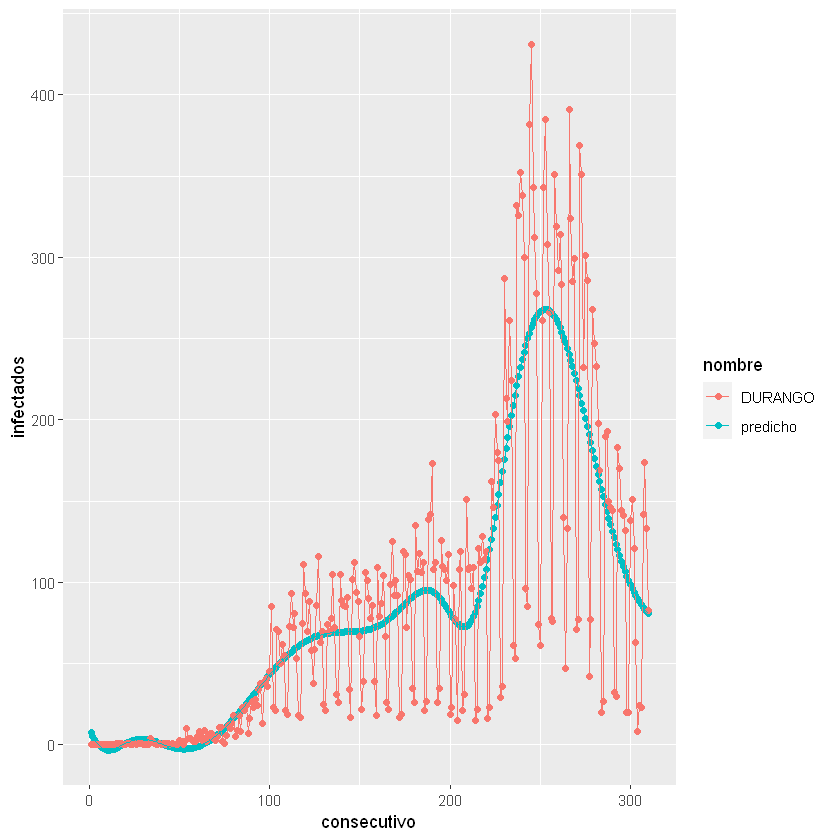

In [53]:
resultado <- data.frame(
    nombre ="predicho",
    consecutivo= 1:310,
    infectados = eval_nn* ((max_inf-min_inf)+min_inf)*max_d[2]/100000
)
#resultado

datosfs <- datosDgo %>% select(nombre,consecutivo,infectados)
resultado <- rbind(resultado,datosfs) # unimos prediccion y datos Dgo en una columna

resultado %>% ggplot(aes(x=consecutivo, y =infectados,group=nombre, color=nombre))+
    geom_point()+ geom_line()
